
<div align="center">

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangtgao/DS-UA_201-Causal-Inference-Spring-2025/blob/main/labs/2-Probability.ipynb)

</div>






$$
\begin{array}{c}
\textbf{CAUSAL INFERENCE}\\\\
\textbf{Xiang Gao} \\
\textit{Center for Data Science, New York University} \\\\
\textit{January 31, 2025}\\\\\\
\text{Materials prepared by: Daniela Pinto Veizaga, Xiang Pan, and Xiang Gao}
\end{array}
$$

---

## Joint Probability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(f"2-data.csv")

In [3]:
df

,Height,Weight,Sex
0,165.65,35.41,Female
1,148.53,74.45,Female
2,167.04,81.22,Male
3,161.54,71.47,Male
4,174.31,78.18,Male
...,...,...,...
2995,150.83,49.66,Female
2996,157.09,64.34,Female
2997,162.99,45.58,Female
2998,154.76,48.92,Female


## Joint Distribution

The data is continuous, but we can bin it to make it discrete.

\begin{align}
P(X = x, Y = y) = \frac{N_{x,y}}{N}
\end{align}

We want to know what's the probability of height larger than $h$ and gender is male.

\begin{align}
P(H > h, G = M) = \frac{N_{h, M}}{N}
\end{align}

In [4]:
h = 180
g = "Male"

group = df[(df["Height"] > h) & (df["Sex"] == g)]
print(f"The probability of a person being {g} and taller than {h} cm is {len(group) / len(df)}")

The probability of a person being Male and taller than 180 cm is 0.08466666666666667


## Convert the Joint Distribution to Marginal Distribution

What is the probability of height larger than $h$?

We can sum over all the weights.

\begin{align}
P(H > h) = \sum_{g} P(H > h, G = g) = \sum_{g} \frac{N_{h, g}}{N}
\end{align}


In [5]:
group_male_height = df[(df["Height"] > h) & (df["Sex"] == "Male")]
group_female_height = df[(df["Height"] > h) & (df["Sex"] == "Female")]

print(f"The probability of a person being male and taller than {h} cm is {len(group_male_height) / len(df)}")
print(f"The probability of a person being female and taller than {h} cm is {len(group_female_height) / len(df)}")

The probability of a person being male and taller than 180 cm is 0.08466666666666667
The probability of a person being female and taller than 180 cm is 0.0016666666666666668


In [6]:
group_height = df[df["Height"] > h]
print(f"The probability of a person being taller than {h} cm is {len(group_height) / len(df)}")

# we can verify
p = len(group_male_height) / len(df) + len(group_female_height) / len(df)
print(f"The probability of a person being taller than {h} cm is {p}")

The probability of a person being taller than 180 cm is 0.08633333333333333
The probability of a person being taller than 180 cm is 0.08633333333333333


## Covariance

\begin{align}
Cov(X, Y)
= E[(X - E[X])(Y - E[Y])]
= E[XY] - E[X]E[Y]
\end{align}


\begin{align}
Cov(X, Y) = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu_x)(y_i - \mu_y)
\end{align}

## Covariance is a measure of the linear relationship between two variables.


$$
Cov(X, Y) = Cov(Y, X)
$$

$$
Cov(X, a) = 0
$$

$$
Cov(X+Y, Z) = Cov(X, Z) + Cov(Y, Z)
$$

$$
Cov(a+bX, Y) = bCov(X, Y)
$$

https://numpy.org/doc/stable/reference/generated/numpy.cov.html

In [7]:
X = np.random.randn(1000)
Y = 2 * X + 1
print(np.cov(X, Y))

[[1.06096618 2.12193236]
 [2.12193236 4.24386472]]


In [9]:
X = np.random.randn(1000)
Y = np.zeros(1000)
print(np.cov(X, Y))

[[0.93377653 0.        ]
 [0.         0.        ]]


$$
\widehat{Cov}(X, Y) = \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})
$$

What if the X is more than one dimension?

$$
X \sim N(\mu_X, \Sigma_X)
$$

$$
Y = aX + b
$$

$$
Y \sim N(a\mu_X + b, a^2\Sigma_X)
$$

In [10]:
mu_x = np.array([1, 2])
sigma_x = np.array([[1, 0], [0, 1]])
# sample 1000 points
x = np.random.multivariate_normal(mu_x, sigma_x, 1000)
a = 2
b = 1
y = a * x + b

In [14]:
y.shape

(1000, 2)

In [15]:
x.shape

(1000, 2)

In [17]:
#* flat version
print(np.var(x - mu_x))

1.035268919885474


In [18]:
print(np.var(y - np.mean(y)))

5.10417004640507


In [19]:
print(np.var(x, axis=0))

[1.04988033 1.02048726]


In [20]:
print(np.var(y, axis=0))

[4.19952132 4.08194902]


## Variance of x
$$
\operatorname{Var}(X) = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu_x)^2
$$

## Properties
<!-- \operatorname{Var}(X+Y)=\operatorname{Var}(X)+\operatorname{Var}(Y)+2 \operatorname{Cov}(X, Y) -->
$$
\operatorname{Var}(X+Y) = \operatorname{Var}(X) + \operatorname{Var}(Y) + 2 \operatorname{Cov}(X, Y)
$$
$$
\operatorname{Var}(X-Y) = \operatorname{Var}(X) + \operatorname{Var}(Y) - 2 \operatorname{Cov}(X, Y)
$$
$$
\operatorname{Var}(aX + bY) = a^2 \operatorname{Var}(X) + b^2 \operatorname{Var}(Y) + 2ab \operatorname{Cov}(X, Y)
$$



In [21]:
X = np.random.randn(1000)
Y = 2 * X + 1
print(np.cov(X, Y))

[[0.98030918 1.96061836]
 [1.96061836 3.92123672]]


In [22]:
c = X + Y
print(np.var(X), np.var(Y), np.var(c))
print(np.cov(X, Y)[0, 1])
print(np.var(X) + np.var(Y) + 2 * np.cov(X, Y)[0, 1])

0.9793288699394576 3.9173154797578302 8.81395982945512
1.960618358237153
8.817881066171594


$$
\begin{aligned}
\operatorname{Var}(X + Y) &= E[(X + Y - E[X + Y])^2] && \text{(Definition of variance)} \\
&= E[(X + Y - (E[X] + E[Y]))^2] && \text{(Substitute } E[X + Y] = E[X] + E[Y]) \\
&= E[(X - E[X] + Y - E[Y])^2] && \text{(Rearrange terms)} \\
&= E[(X - E[X])^2] + E[(Y - E[Y])^2] + 2E[(X - E[X])(Y - E[Y])] && \text{(Expand the square)} \\
&= \operatorname{Var}(X) + \operatorname{Var}(Y) + 2 \operatorname{Cov}(X, Y)
\end{aligned}
$$

## Correlation

Covariance has the unit of the product of the units of the two variables.

X: cm, Y: kg

$$
Cov(X, Y) = 10 (\text{cm} \cdot \text{kg})
$$

Normalization by the standard deviation will give us a unitless quantity.

$$
\rho_{X, Y} = \frac{Cov(X, Y)}{\sqrt{Var(X)Var(Y)}}
$$

$$
\rho_{X, Y} \in [-1, 1]
$$

Cauchy-Schwarz Inequality:

$$
|\mathbb{E}[X Y]| \leq \sqrt{\mathbb{E}\left[X^2\right] \cdot \mathbb{E}\left[Y^2\right]}
$$


$$
|\operatorname{Cov}(X, Y)|=|\mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])]| \leq \sqrt{\mathbb{E}\left[(X-\mathbb{E}[X])^2\right] \cdot \mathbb{E}\left[(Y-\mathbb{E}[Y])^2\right]}
$$


### Interpretation:

If $\rho_{X, Y} = 1$, then $Y = aX + b$ with $a > 0$.

If $\rho_{X, Y} = -1$, then $Y = aX + b$ with $a < 0$.

If $\rho_{X, Y} = 0$, then $X$ and $Y$ are independent, $Y$ is constant to $X$.

## Correlation $\not\implies$ Causation

Causal Graph (DAG)
We can represent this situation with a directed acyclic graph (DAG), where:
- $W=1$ Hot Weather
- $I=1$ Ice Cream Sales
- $D=1$ Drowning Incidents

The causal relationships are:
- $W \rightarrow I$ (Hot weather increases ice cream sales)
- $W \rightarrow D$ (Hot weather increases the likelihood of drowning incidents)

<ipython-input-23-0f44554ae9d0>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


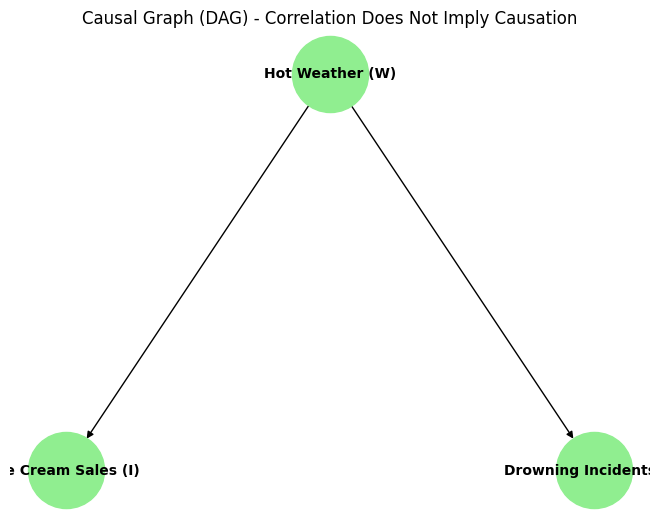

In [23]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Hot Weather (W)")
G.add_node("Ice Cream Sales (I)")
G.add_node("Drowning Incidents (D)")

# Add directed edges representing causal relationships
G.add_edge("Hot Weather (W)", "Ice Cream Sales (I)")
G.add_edge("Hot Weather (W)", "Drowning Incidents (D)")

# Draw the graph
pos = {
    "Hot Weather (W)": (0, 1),
    "Ice Cream Sales (I)": (-1, 0),
    "Drowning Incidents (D)": (1, 0),
}

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold", arrows=True)
plt.tight_layout()

plt.title("Causal Graph (DAG) - Correlation Does Not Imply Causation")
plt.show()


Correlation between Ice Cream Sales and Drowning Incidents: 0.1812
Correlation between Ice Cream Sales and Hot Weather: 0.7026
Correlation between Drowning Incidents and Hot Weather: 0.2395

Drowning rates by Ice Cream Sales:
Ice Cream Sales
0    0.046310
1    0.152104
Name: Drowning Incidents, dtype: float64


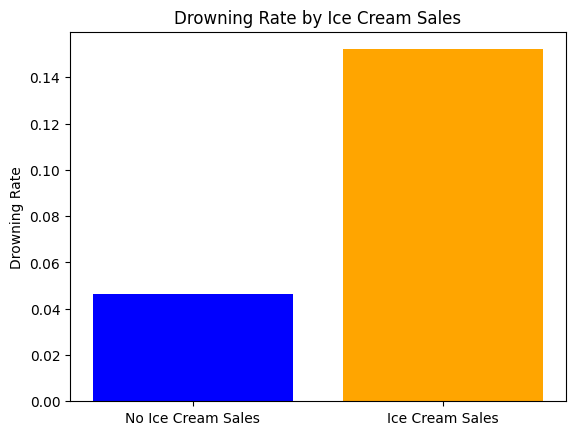

In [24]:
# Number of individuals (or time periods)
n = 1000

# Probability of hot weather
p_hot_weather = 0.3

# Ice cream sales probabilities
p_ice_cream_if_hot = 0.8
p_ice_cream_if_not_hot = 0.1

# Drowning incidents probabilities
p_drowning_if_hot = 0.2
p_drowning_if_not_hot = 0.05

# Simulate Hot Weather
np.random.seed(42)
hot_weather = np.random.binomial(1, p_hot_weather, n)

# Simulate Ice Cream Sales based on weather
ice_cream_sales = np.where(hot_weather == 1,
                           np.random.binomial(1, p_ice_cream_if_hot, n),
                           np.random.binomial(1, p_ice_cream_if_not_hot, n))

# Simulate Drowning Incidents based on weather
drowning_incidents = np.where(hot_weather == 1,
                              np.random.binomial(1, p_drowning_if_hot, n),
                              np.random.binomial(1, p_drowning_if_not_hot, n))

# Create a DataFrame for analysis
df = pd.DataFrame({
    'Hot Weather': hot_weather,
    'Ice Cream Sales': ice_cream_sales,
    'Drowning Incidents': drowning_incidents
})

# Calculate correlations
correlation_ice_drowning = df[['Ice Cream Sales', 'Drowning Incidents']].corr().iloc[0, 1]
correlation_ice_weather = df[['Ice Cream Sales', 'Hot Weather']].corr().iloc[0, 1]
correlation_drowning_weather = df[['Drowning Incidents', 'Hot Weather']].corr().iloc[0, 1]

# Print correlation results
print(f"Correlation between Ice Cream Sales and Drowning Incidents: {correlation_ice_drowning:.4f}")
print(f"Correlation between Ice Cream Sales and Hot Weather: {correlation_ice_weather:.4f}")
print(f"Correlation between Drowning Incidents and Hot Weather: {correlation_drowning_weather:.4f}")

# Grouped statistics to check rates
ice_cream_drowning_rate = df.groupby('Ice Cream Sales')['Drowning Incidents'].mean()
print("\nDrowning rates by Ice Cream Sales:")
print(ice_cream_drowning_rate)

# Plot the results
plt.bar(['No Ice Cream Sales', 'Ice Cream Sales'], ice_cream_drowning_rate, color=['blue', 'orange'])
plt.title('Drowning Rate by Ice Cream Sales')
plt.ylabel('Drowning Rate')
plt.show()


## Causation $\not\implies$ Correlation

Antihistamines causally reduce sneezing

People taking antihistamines sneeze more than average

Negative causal effect of antihistamines on sneezing but

positive correlation b/w antihistamine use and sneezing

- $A=1$ if a person takes antihistamines, 0 otherwise.
- $S=1$ if a person sneezes, 0 otherwise.
- $C=1$ if a person has the underlying condition (e.g., allergies), 0 otherwise.

Assumptions:
1. $A$ and $S$ are dependent on $C$, meaning:
- People with allergies $(C=1)$ are more likely to take antihistamines.
- People with allergies $(C=1)$ sneeze more frequently.
1. Negative causal effect of antihistamines: Antihistamines reduce sneezing, i.e., $P(S=1 \mid A=1, C=1)<P(S=1 \mid A=0, C=1)$.

Model:
We can model the probability of sneezing $S$ as a function of antihistamine use $A$, the underlying condition $C$, and their relationships:

$$
P(S=1 \mid A=a, C=c)=\alpha_c-\beta \cdot a
$$

where:
- $\alpha_c$ captures the baseline sneezing rate based on the condition $C$.
- $\beta$ captures the reduction in sneezing due to antihistamines.

Similarly, we can model the probability of taking antihistamines as a function of the underlying condition:

$$
P(A=1 \mid C=c)=\gamma \cdot c
$$


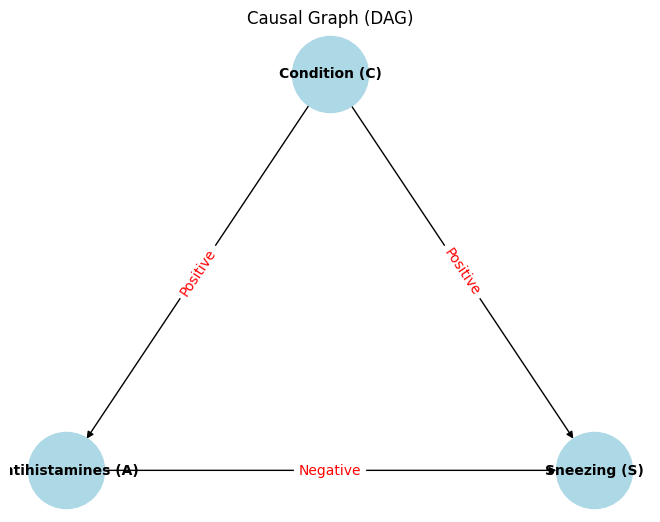

In [25]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Condition (C)")
G.add_node("Antihistamines (A)")
G.add_node("Sneezing (S)")

# Add directed edges representing causal relationships
G.add_edge("Condition (C)", "Antihistamines (A)")
G.add_edge("Condition (C)", "Sneezing (S)")
G.add_edge("Antihistamines (A)", "Sneezing (S)")

# Draw the graph
pos = {
    "Condition (C)": (0, 1),
    "Antihistamines (A)": (-1, 0),
    "Sneezing (S)": (1, 0),
}

labels = {
    ("Condition (C)", "Antihistamines (A)"): "Positive",
    ("Condition (C)", "Sneezing (S)"): "Positive",
    ("Antihistamines (A)", "Sneezing (S)"): "Negative",
}

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color="red")

plt.title("Causal Graph (DAG)")
plt.show()


Correlation between antihistamine use and sneezing: 0.2137

Average sneezing rates:
Antihistamines
0    0.112332
1    0.309392
Name: Sneezing, dtype: float64


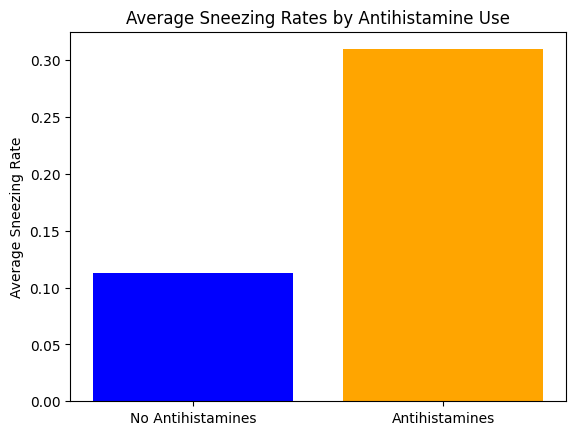

In [26]:
# Number of individuals
n = 1000

# Parameters
p_condition = 0.2  # Probability of having the underlying condition (allergies)
alpha_c1 = 0.8     # Sneezing rate with condition and without antihistamines
alpha_c0 = 0.1     # Sneezing rate without condition
beta = 0.5         # Effect of antihistamines on sneezing
gamma = 0.9        # Probability of taking antihistamines with the condition

# Simulate data
np.random.seed(42)
C = np.random.binomial(1, p_condition, n)  # Condition presence
A = np.random.binomial(1, gamma * C)       # Antihistamine use based on condition

# Sneezing probability based on condition and antihistamine use
sneezing_prob = np.where(C == 1, alpha_c1 - beta * A, alpha_c0)
S = np.random.binomial(1, sneezing_prob)  # Sneezing occurrences

# Create a DataFrame for analysis
df = pd.DataFrame({'Condition': C, 'Antihistamines': A, 'Sneezing': S})

# Calculate correlations
correlation = df[['Antihistamines', 'Sneezing']].corr().iloc[0, 1]

# Print results
print(f"Correlation between antihistamine use and sneezing: {correlation:.4f}")

# Grouped statistics to check average sneezing rates
sneezing_rates = df.groupby('Antihistamines')['Sneezing'].mean()
print("\nAverage sneezing rates:")
print(sneezing_rates)

# Plot the results
plt.bar(['No Antihistamines', 'Antihistamines'], sneezing_rates, color=['blue', 'orange'])
plt.title('Average Sneezing Rates by Antihistamine Use')
plt.ylabel('Average Sneezing Rate')
plt.show()

## Conditional Distribution

$$
\mathbb{E}\left[Y \mid X=x_i\right]=\sum_{j=1}^k y_j P\left(Y=y_j \mid X=x_i\right)
$$

$$
\mathbb{E}[Y \mid X=x]=\int_{-\infty}^{\infty} y f(y \mid x) d y
$$

1. $E[g(X) + h(X)Y \mid X] = g(X) + h(X)E[Y \mid X]$

2. $E[Y + Z \mid X] = E[Y \mid X] + E[Z \mid X]$

3. If $Y \leq Z$ (always), then $E[Y \mid X] \leq E[Z \mid X]$

Recall:

+ $\mathbb{E}$ is a linear operator

## Law of Iterated Expectations


$$\mathbb{E}[X]=\mathbb{E}[\mathbb{E}[X \mid Y]]$$

Trivial Proof:

\begin{align}
\mathbb{E}[\mathbb{E}(X \mid Y)] & =\mathbb{E}\left[\sum_{x \in \mathcal{X}} x \cdot \operatorname{Pr}(X=x \mid Y)\right] \\
& =\sum_{y \in \mathcal{Y}}\left[\sum_{x \in \mathcal{X}} x \cdot \operatorname{Pr}(X=x \mid Y=y)\right] \cdot \operatorname{Pr}(Y=y) \\
& =\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} x \cdot \operatorname{Pr}(X=x \mid Y=y) \cdot \operatorname{Pr}(Y=y) \\
& =\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} x \cdot \operatorname{Pr}(X=x, Y=y) \\
& =\sum_{x \in \mathcal{X}} x \sum_{y \in \mathcal{Y}} \operatorname{Pr}(X=x, Y=y) \\
& =\sum_{x \in \mathcal{X}} x \cdot \operatorname{Pr}(X=x) \\
& =\mathbb{E}(X)
\end{align}


## Conditional Variance


\begin{align}
 \text{Var}(Y|X) &= E[(Y - E[Y|X])^2 | X] \\
 &= E[Y^2|X] - (E[Y|X])^2
\end{align}


In [27]:
# Step 1: Generate synthetic data for (X, Y) pairs
np.random.seed(201)
X = np.random.randint(1, 6, size=100)  # Random values for X
epsilon = np.random.normal(0, 1, 100)  # Noise
Y = 2 * X + epsilon  # Y depends on X with some noise

# Step 2: Compute Conditional Expectation
def conditional_expectation(Y, X, value):
    return np.mean(Y[X == value])

# Step 3: Compute Conditional Variance
def conditional_variance(Y, X, value):
    E_Y_given_X = conditional_expectation(Y, X, value)
    return np.mean((Y[X == value] - E_Y_given_X)**2)

# Test conditional variance for specific values of X (e.g., X = 3)
values = [1, 2, 3, 4, 5]
for value in values:
  cond_var = conditional_variance(Y, X, value)
  print(f"Conditional Variance of Y given X = {value}: {cond_var}")

Conditional Variance of Y given X = 1: 0.47276544589467157
Conditional Variance of Y given X = 2: 0.819919742028449
Conditional Variance of Y given X = 3: 0.9370777623587184
Conditional Variance of Y given X = 4: 0.7220822662193119
Conditional Variance of Y given X = 5: 0.5304455160067575


In [29]:
# Alternative form of the conditional variance
def conditional_variance_alt(Y, X, value):
    return np.mean(Y[X == value]**2) - np.mean(Y[X == value])**2

# Test conditional variance for specific values of X (e.g., X = 3)
values = [1, 2, 3, 4, 5]
for value in values:
  cond_var = conditional_variance(Y, X, value)
  print(f"Conditional Variance of Y given X = {value}: {cond_var}")

Conditional Variance of Y given X = 1: 0.47276544589467157
Conditional Variance of Y given X = 2: 0.819919742028449
Conditional Variance of Y given X = 3: 0.9370777623587184
Conditional Variance of Y given X = 4: 0.7220822662193119
Conditional Variance of Y given X = 5: 0.5304455160067575


Additional property:

$$
\text{Var}(g(X) + h(X)Y | X) = h(X)^2 \text{Var}(Y | X)
$$

In [30]:
# Define g(X)
def g(X):
    return X ** 2  # Example function g(X)

# Define h(X)
def h(X):
    return 3 * X  # Example function h(X)

# New Conditional Variance with g(X) + h(X)Y
def conditional_variance_with_g_and_h(Y, X, value):
    E_Y_given_X = conditional_expectation(Y, X, value)
    return np.mean((g(X[X == value]) + h(X[X == value]) * Y[X == value]
                    - (g(X[X == value]) + h(X[X == value]) * E_Y_given_X))**2)

# Step 1: Calculate original conditional variance for X = 3
value = 3
original_cond_var = conditional_variance(Y, X, value)

# Step 2: Calculate conditional variance of g(X) + h(X)Y | X = 3
new_cond_var = conditional_variance_with_g_and_h(Y, X, value)

# Step 3: Verify that Var(g(X) + h(X)Y | X) = h(X)^2 * Var(Y | X)
h_X = h(value)  # Calculate h(X) for X = 3
expected_new_cond_var = h_X**2 * original_cond_var

print(f"Original Conditional Variance of Y given X = {value}: {original_cond_var}")
print(f"New Conditional Variance of g(X) + h(X)Y given X = {value}: {new_cond_var}")
print(f"Expected Conditional Variance of g(X) + h(X)Y given X = {value}: {expected_new_cond_var}")

Original Conditional Variance of Y given X = 3: 0.9370777623587184
New Conditional Variance of g(X) + h(X)Y given X = 3: 75.90329875105617
Expected Conditional Variance of g(X) + h(X)Y given X = 3: 75.9032987510562


## Independence

$$
P(X \in A, Y \in B) = P(X \in A)P(Y \in B)
$$

Also,

$$
P(Y|X) = P(Y) \ \ \text{and} \ \ P(X|Y) = P(X)
$$

If two variables are independent, then knowing the value of one variable does not provide additional information about the other.

It is also the case that independent variables have a covariance of 0 and are, therefore, uncorrelated.
- Proof in lecture slides by showing

$$\mathbb{E}[XY]=\mathbb{E}[X]\mathbb{E}[Y]$$

Let's go through some simulations!

In [32]:
# Step 1: Simulate independent random variables
np.random.seed(201)
X_ind = np.random.randint(1, 7, 1000)  # Roll of die 1
Y_ind = np.random.randint(1, 7, 1000)  # Roll of die 2

# Step 2: Calculate covariance of independent variables
cov_ind = np.cov(X_ind, Y_ind)[0, 1]
print(f"Covariance of independent variables: {cov_ind}")

# Step 3: Simulate dependent variables
X_dep = np.random.randint(1, 10, 1000)
Y_dep = 2 * X_dep + np.random.normal(0, 1, 1000)

# Calculate covariance of dependent variables
cov_dep = np.cov(X_dep, Y_dep)[0, 1]
print(f"Covariance of dependent variables: {cov_dep}")

Covariance of independent variables: -0.09712712712712727
Covariance of dependent variables: 12.798416177120513


We see that independence implies 0 covariance and uncorrelatedness.

However, the converse statement is false. Independence is not necessary for uncorrelatedness.

Covariance between X and Y: -5.442179332609252e-06


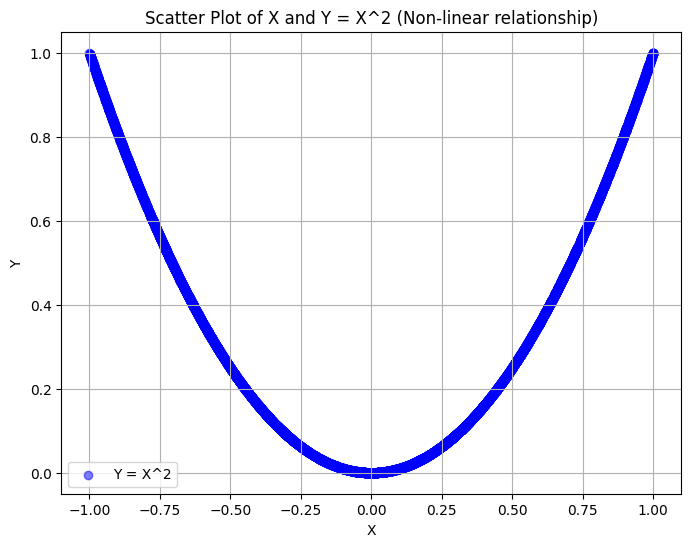

In [33]:
# Generate X uniformly from [-1, 1]
np.random.seed(201)
X = np.random.uniform(-1, 1, 10000)

# Define Y as X^2
Y = X**2

# Calculate covariance
cov_XY = np.cov(X, Y)[0, 1]
print(f"Covariance between X and Y: {cov_XY}")

# Create a scatter plot to visualize the relationship between X and Y
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Y = X^2')
plt.title('Scatter Plot of X and Y = X^2 (Non-linear relationship)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

See examples (dependent but uncorrelated) from the third row in the following picture.

![Indep](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png)